In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scripts2.Cross_neutralization.Compute_FR_major import Compute_FR_major
Folder = "Compare_variants/June-2024-MS_Revisions/"
# all lineages to simulate
lin_list = ["Alpha", 
            "Delta", 
            "Omicron(BA.1)", 
           ]#"BA.2"]
# mutations lists must correspond to lin_list
mut_list = [Folder+"Alpha.txt", 
            Folder+"Delta.txt",
            Folder+"BA.1.txt",
            Folder+"BA.2.txt"]

### Uncomment this if you change the mutation profiles above
#Compute_FR_major(None, None, "data/epitope_data/dms_per_ab_per_site.csv", None, None, 4, lin_list, mut_list,Folder+"Cross_Sim.pck")

In [3]:
### IC50 and antibody potency computed previously
potency = {"A":0.168746, "B":0.098073,
            "C":0.389699, "D1":0.402943,
            "D2":0.112063, "E12":0.659345,
            "E3":1.605838, "F1":1.970766,
            "F2":0.550316, "F3":0.579354, "NTD":1}
IC50 = 1.52458334405196

import pickle
def PNeut(c, lineage, antigen, cross_dic, var_cross):
    Ab_list = list(cross_dic.keys())
    i1 = var_cross.index(antigen)
    i2 = var_cross.index(lineage)
    
    neut_curve = 1 - np.prod(np.array([1 - c/(c + (cross_dic[ab][i1, i2]*potency[ab]*IC50))for ab in Ab_list]), axis = 0)
    return neut_curve  

In [4]:
import pandas as pd
import numpy as np
"""Neutralization assay data as listed references from 1 to 14 in Miejers supplementary table (Folder+"Neut_assays/1-s2.0-S0092867423010760-mmc2.xlsx")"""
## (1) Bates 2021
Bates2021 = pd.read_excel(Folder+"Neut_assays/Bates2021.xlsx", sheet_name = "Figure 1B", engine='openpyxl')
alpha_bates = list(Bates2021["WA1 (FRNT50)"].to_numpy()/Bates2021["B.1.1.7 (FRNT50)"].to_numpy())
print("(1) GM Bates Alpha", np.prod(alpha_bates)**(1/len(alpha_bates)), " | Normal Mean", np.mean(alpha_bates))

# (2) Cameroni et al. 2022 (Full data available upon Request, here I used plotdizitizer to extract the datapoints)
#for all comparison against D614G (only 37 for omicron in Meijers)
#--- Plotdigitized
rD614G_cameroni = np.array([124.762, 195.526, 236.583, 370.771, 402.330,
                            480.229, 581.069, 656.814, 762.928, 1179.49,
                            1388.82, 1507.03, 2743.38, 3230.27, 3553.27])

rOmicron_cameroni = np.array([3.98243, 3.98243, 7.55177, 7.55177, 7.65529, 
                              11.3614, 12.4975, 14.5165, 16.1869, 16.8618, 
                              17.0929, 43.1405, 116.552, 128.206, 172.978])

omicron_cameroni = rD614G_cameroni/rOmicron_cameroni

print("(2) <<< (*) GM Cameroni Omicron Reported (37 in Meijers and 2, but maybe it's a bit different because plotdigitizer required manually clicking on the datapoints)", np.prod(omicron_cameroni)**(1/len(omicron_cameroni)), " | Normal Mean", np.mean(omicron_cameroni))

# (3) Garcia-Beltran et al. 2021 (Full data available upon Request, but 2.1 FR for Alpha reported for Pfizer in text)
# --- Plotdigitized
rWT_GB = np.array([174.333, 213.820, 332.788, 500.619, 703.543, 892.769, 
                   1172.10, 1952.72, 2237.45, 2477.93, 3253.23,
                   3990.11, 5419.89, 7115.69, 10704.3, 13128.8])
rAlpha_GB = np.array([64.9842, 74.4597, 174.333, 500.619, 321.654, 408.167,
                      614.013, 779.158, 1022.94, 1592.10, 2020.31,
                      3253.23, 4128.23, 5419.89, 9029.53, 13128.8])

alpha_GB = rWT_GB/rAlpha_GB
print("(3) <<< (*) GM Garcia-Beltran Alpha (2.1 in Meijers and (3), but my digitization might be noisy)", np.prod(alpha_GB)**(1/len(alpha_GB)), " | Normal Mean", np.mean(alpha_GB))

# (4) Liu et al. 2021, Supplementary Table S4 pfizer (B.1.617.2) (Folder+Neut_assays/Liu2021b_BNT662b2.pdf)
Delta_liu = [2.1, 1, 2.7, 0.6, 3., 1.7, 1.0, 6.0,
             6.8, 5.2, 6.2, 1.8, 2.0, 2.3, 2.8, 3.8, 
             2.2, 2.5, 3.0, 3.1, 4.7, 1.8, 4.5, 1.1, 1.9]

print("(4) GM Liu 2021a Delta", np.prod(Delta_liu)**(1/len(Delta_liu)), " | Normal Mean", np.mean(Delta_liu))

# (5) Zhou et al. 2021 Victoria (SARS-CoV-2/human/AUS/VIC01/2020), an early Wuhan-related isolate
# (This study shows Pfizer FR for B.1.351/Beta and not B.1.1.7/Alpha)
print("(5) >>> GM Zhou Alpha: This study shows Pfizer FR for B.1.351/Beta and not B.1.1.7/Alpha)")

# (6) Wang et al. 2021 Fig. 4B (concept of fold change is not clear, some <0 some >0, does not look like the ratios)
### But stated that in text that there was essentially no change pfizer neutralization of variant vs wt (so FR = 1 as stated in Meijers et al)
alpha_Wang_orig = np.array([1.3, -1.8, 1.1, -1.7, 1.6, 1.7, 2.4, 1.1, 2.3, -1.])
alpha_Wang = list(2**(alpha_Wang_orig))# base 10 and base e gives too high values
print("(6) <<< GM Wang Alpha (1 in Meijers)", np.prod(alpha_Wang)**(1/len(alpha_Wang)), " | Normal Mean", np.mean(alpha_Wang))

# (7) Liu et al. 2021, BNT162b2... PRNT_50 assay (Folder+Neut_assays/Liu2021a_data.pdf)
wt = np.array([453, 160, 905, 640, 320, 453, 640, 320, 905, 640, 640, 640, 1280, 320, 320, 320, 640, 640, 640, 640])
alp = np.array([640, 80, 1280, 640, 320, 320, 640, 320, 1280, 640, 640, 1280, 1280, 320, 640, 1280, 640, 640, 640, 640])
alpha_Liu = list(wt/alp)

print("(7) GM Liu 2021b Alpha", np.prod(alpha_Liu)**(1/len(alpha_Liu)), " | Normal Mean", np.mean(alpha_Liu))

# (8) Mlcochova, P. et al. 2021, No data table, just the FR values reported in Fig.1d for BNT162b2
# --- Plotdigitized
rWT_Mlc = np.array([796.183, 1179.61, 1915.18, 3023.35, 2835.19, 4801.17, 5888.33, 9030.76, 18157.8, 37966.9])
rAlpha_Mlc = np.array([265.185, 364.581, 447.981, 657.475, 594.167, 595.451, 483.682, 619.894, 1080.80, 22107.7])
rDelta_Mlc = np.array([198.864, 203.645, 212.119, 253.494, 280.125, 346.724, 414.355, 474.242, 2152.11, 21811.2])

alpha_Mlc = rWT_Mlc/rAlpha_Mlc
Delta_Mlc = rWT_Mlc/rDelta_Mlc

print("(8) <<< (*) GM  Mlcochova Alpha (5.8 in Meijers and (8))", np.prod(alpha_Mlc)**(1/len(alpha_Mlc)),  " | Normal Mean", np.mean(alpha_Mlc))
print("(8) <<< (*) GM  Mlcochova Delta (8.4 in Meijers and (8))", np.prod(Delta_Mlc)**(1/len(Delta_Mlc)), " | Normal Mean", np.mean(Delta_Mlc))


# (9) Planas et al data Alpha (B.1.1.7), Delta (B.1.617.2) against D614G week 3 and week 8 after Pfizer vaccine BNT162b2
Planas_W3 = pd.read_excel(Folder + "Neut_assays/41586_2021_3777_MOESM4_ESM.xlsx", sheet_name = "Fig 2b Pfizer W3", engine='openpyxl')
Planas_W8 = pd.read_excel(Folder + "Neut_assays/41586_2021_3777_MOESM4_ESM.xlsx", sheet_name = "Fig 2b Pfizer W8", engine='openpyxl')

alpha_planas = list(Planas_W3["D614G"].to_numpy()/Planas_W3["B.1.1.7"].to_numpy())
alpha_planas += list(Planas_W8["D614G"].to_numpy()/Planas_W8["B.1.1.7"].to_numpy())
alpha_planas = np.array(alpha_planas)
alpha_planas = alpha_planas[~np.isnan(alpha_planas)]

print("(9) <<< GM Planas Alpha (1 in Meijers)", np.prod(alpha_planas)**(1/len(alpha_planas)), " | Normal Mean", np.mean(alpha_planas))

Delta_planas = list(Planas_W3["D614G"].to_numpy()/Planas_W3["B.1.617.2"].to_numpy())
Delta_planas += list(Planas_W8["D614G"].to_numpy()/Planas_W8["B.1.617.2"].to_numpy())
Delta_planas = np.array(Delta_planas)
Delta_planas = Delta_planas[~np.isnan(Delta_planas)]
print("(9) <<< GM Planas Delta (3 in Meijers)", np.prod(Delta_planas)**(1/len(Delta_planas)), " |Normal Mean", np.mean(Delta_planas))


# (10) Planas et al Delta, Omicron data (41586_2021_4389_MOESM5_ESM.xlsx contains subtables instead of sheets, it's faster to copy the numbers)
# 2 Dose Pfizer 
rD614Gplanas = np.array([44.67, 118.1, 252.9, 371.2, 701, 679.7, 221, 98.04, 522.2, 106.2, 1283, 914.2, 3140, 1023, 286.2, 150.8])
rDelta_planas2 = np.array([15, 55.62, 74.03, 218.2, 107, 214.8, 15, 37.35, 215.8, 15, 487.3, 347.5, 1323, 336.1, 55.14, 38.94])
rOmicron_planas = np.array([15,15, 15, 15, 15, 15, 15, 15, 15, 15, 61.55, 15, 15, 15, 15, 15])

Delta_planas2 = list(rD614Gplanas/rDelta_planas2)
omicron_planas = list(rD614Gplanas/rOmicron_planas)

print("(10) <<< GM Planas Delta (not in Meijers but given in (10))", np.prod(Delta_planas2)**(1/len(Delta_planas2)), " | Normal Mean", np.mean(Delta_planas2))
print("(10) <<< GM Planas Omicron (>32 in Meijers)", np.prod(omicron_planas)**(1/len(omicron_planas)), " | Normal Mean", np.mean(omicron_planas))

# (11) Muik et al  data Table S1 (Folder+Neut_assays/abg6105_muik_sm.pdf)
pVNT50_Wuhan = np.array([160, 114.1, 223.2, 193, 111.9, 128, 278.1, 203.6, 94.91, 209.7, 
                         50.82, 241.3, 174, 292.5, 186.7, 86.28, 229.8, 951.5, 253.1, 142.9,
                        308.3, 245.7, 241.7, 473.1, 546.8, 174.2, 151.9, 242.8, 442.6, 417.8,
                        188.2, 317.9, 155, 352.1, 257.4, 410.5, 1066, 655, 103, 196])
pVNT50_Alpha = np.array([161.2, 85.75, 128.6, 268.4, 64.26, 99.08, 226.8, 185, 58.4, 126.8,
                  41.66, 486.1, 84.84, 136.7, 121.6, 116.2, 220.8, 1215, 162, 152, 158.9,
                  181.6, 276.9, 262.2, 280.8, 208.3, 136.1, 132.7, 631.1, 243.1, 94.29, 249.1,
                  119.3, 262.4, 157.9, 323.4, 961.1, 1009, 79.05, 160])
alpha_muik = list(pVNT50_Wuhan/pVNT50_Alpha)

print("(11) <<< GM Muik Alpha (1.28 in Meijers)", np.prod(alpha_muik)**(1/len(alpha_muik)), " | Normal Mean", np.mean(alpha_muik))

# (12) Uriu et al Alpha, Delta against pfizer Table S7 (Folder+Neut_assays/Uriu_nejmc2114706_appendix.pdf)
rParental = np.array([555, 2417, 613, 1186, 361, 206, 368, 595, 256, 448, 715, 854, 1260, 313])
rAlpha = np.array([440, 880, 415, 131, 161, 179, 227, 597, 81, 192, 271, 420, 691, 1407])
rDelta = np.array([84, 623, 260, 239, 151, 149, 96, 520, 224, 218, 239, 349, 265, 511])
alpha_Uriu = rParental/rAlpha
Delta_Uriu = rParental/rDelta

print("(12) <<< GM Uriu Alpha (2.3 in Meijers)", np.prod(alpha_Uriu)**(1/len(alpha_Uriu)), "| Normal Mean", np.mean(alpha_Uriu))
print("(12) <<< GM Uriu Delta (2.9 in Meijers)", np.prod(Delta_Uriu)**(1/len(Delta_Uriu)), "| Normal Mean", np.mean(Delta_Uriu))

# (13) Rössler Omicron Delta against Pfizer
# --- Plotdigitized
rAlpha_rossler = np.array([248.778, 320.835, 376.119, 542.158, 605.977, 781.494, 916.156, 1144.54])
rDelta_rossler = np.array([125.581, 154.412, 189.862, 240.992, 315.775, 376.119, 477.409, 625.554])
rOmicron_rossler = np.array([1.04885, 1.63695, 7.18026, 13.1373, 18.9368, 29.0887, 51.5562, 67.5546])
Delta_rossler = rAlpha_rossler/rDelta_rossler
omicron_rossler = rAlpha_rossler/rOmicron_rossler
print("(13) <<< (*) GM Rossler Delta (2 in Meijers, no WT so Alpha is used)", np.prod(Delta_rossler)**(1/len(Delta_rossler)), "| Normal Mean", np.mean(Delta_rossler))
print("(13) <<< (*) GM Rossler omicron (32 in Meijers, no WT so Alpha is used))", np.prod(omicron_rossler)**(1/len(omicron_rossler)), "| Normal Mean", np.mean(omicron_rossler))

# (14) Gruel et al Alpha Delta Omicron Only Omicron data in Supplementary Table S2 (Folder+Neut_assays/Gruel_41591_2021_1676_MOESM1_ESM.pdf)
# Taking early Serum ID50
rWu01 = np.array([41, 37, 293, 242, 264, 1749, 689, 588, 254, 1478, 
                 1342, 726, 963, 3336, 1006, 521, 823, 1128, 1008, 1334,
                 695, 1600, 294, 311, 474, 551, 831, 408, 270, 352])

# some data are <10 and we fix them at 10
rOmicron = np.array([10, 10, 10, 10, 10, 12, 10, 10, 10, 28, 33, 10, 35, 114,
                    15, 10, 10, 10, 10, 10, 10, 49, 10, 23, 10, 10, 10, 10, 10, 10])

omicron_gruel = list(rWu01/rOmicron)

#  --- Plotdigitized from Fig 1a
rWu01_b = np.array([22.6284, 26.8410, 274.672, 222.406, 187.872, 188.048, 222.873, 242.734, 
                    326.642, 590.814, 498.437, 438.737, 402.605, 541.273, 588.682, 759.876, 
                    760.497, 828.459, 827.976, 1161.69, 1377.15, 1317.92, 1209.81, 937.792, 
                    792.364, 1558.54, 3073.07])

rAlpha_gruel = np.array([10.2058, 13.7482, 68.6264, 77.8555, 118.761, 146.825, 135.032, 135.142, 
                         124.360, 181.879, 266.096, 277.246, 343.359, 424.049, 569.970, 441.560,
                         372.563, 905.974, 646.395, 1121.49, 835.737, 835.055, 620.978, 620.616, 594.408, 
                         523.335, 2303.18])

rDelta_gruel = np.array([2.65894, 2.88913, 25.0447, 43.3562, 45.3682, 78.6953, 75.3544, 63.5427, 
                         63.4908, 72.0377, 85.3986, 114.879, 120.014, 142.257, 168.367, 199.152,
                         161.069, 236.365, 292.320, 359.881, 573.236, 679.873, 652.530, 681.699, 
                         1653.27, 1961.73, 2135.80])

alpha_gruel = rWu01_b/rAlpha_gruel
Delta_gruel = rWu01_b/rDelta_gruel

print("(14) <<< (*) GM Gruel Alpha (1.7 in Meijers)  ", np.prod(alpha_gruel)**(1/len(alpha_gruel)), "| Normal Mean", np.mean(alpha_gruel))
print("(14) <<< (*) GM Gruel Delpha (3.2 in Meijers)  ", np.prod(Delta_gruel)**(1/len(Delta_gruel)), "| Normal Mean", np.mean(Delta_gruel))
print("(14) <<< GM Gruel Omicron (>32 in Meijers)  ", np.prod(omicron_gruel)**(1/len(omicron_gruel)), "| Normal Mean", np.mean(omicron_gruel))

### Prepare data for error bars
alpha_data = [list(alpha_bates),
              alpha_GB, 
              alpha_Liu, 
              alpha_Mlc,
              list(alpha_planas), 
              list(alpha_muik),
              list(alpha_Uriu),
              list(alpha_Wang),
              list(alpha_gruel)]

alpha_sources = ["(1)", "(3)", "(7)", "(8)", "(9)", "(11)", "(12)", "(6)", "(14)"]

Delta_data = [Delta_liu, Delta_Mlc, list(Delta_planas), Delta_planas2, list(Delta_Uriu), list(Delta_rossler), list(Delta_gruel)]
Delta_sources = ["(4)", "(8)", "(9)", "(10)", "(12)", "(13)", "(14)"]

omicron_data = [omicron_cameroni, omicron_planas, omicron_gruel, omicron_rossler]
omicron_sources = ["(2)", "(10)", "(14)", "(13)"]

FR_dic = {"Alpha":alpha_data,  
          "Omicron(BA.1)":omicron_data,
          "Delta": Delta_data}

FR_sources = {"Alpha":alpha_sources,
              "Omicron(BA.1)":omicron_sources,
              "Delta":Delta_sources}


print("")
print("(*) Plotdigitized") 
print(">>> Unclear data")
print("<<< Necessary comparison with Meijers et al.")

(1) GM Bates Alpha 2.6344949179296044  | Normal Mean 3.4675999558384847
(2) <<< (*) GM Cameroni Omicron Reported (37 in Meijers and 2, but maybe it's a bit different because plotdigitizer required manually clicking on the datapoints) 40.429750105400316  | Normal Mean 43.33056585041551
(3) <<< (*) GM Garcia-Beltran Alpha (2.1 in Meijers and (3), but my digitization might be noisy) 1.6945880790380605  | Normal Mean 1.7902850986243408
(4) GM Liu 2021a Delta 2.491817651153046  | Normal Mean 2.9520000000000004
(5) >>> GM Zhou Alpha: This study shows Pfizer FR for B.1.351/Beta and not B.1.1.7/Alpha)
(6) <<< GM Wang Alpha (1 in Meijers) 1.6245047927124712  | Normal Mean 2.432739538383747
(7) GM Liu 2021b Alpha 0.8706281081225461  | Normal Mean 0.9393750000000001
(8) <<< (*) GM  Mlcochova Alpha (5.8 in Meijers and (8)) 5.721581377041096  | Normal Mean 7.320613655271579
(8) <<< (*) GM  Mlcochova Delta (8.4 in Meijers and (8)) 8.209815280132421  | Normal Mean 9.815131145290877
(9) <<< GM Planas 

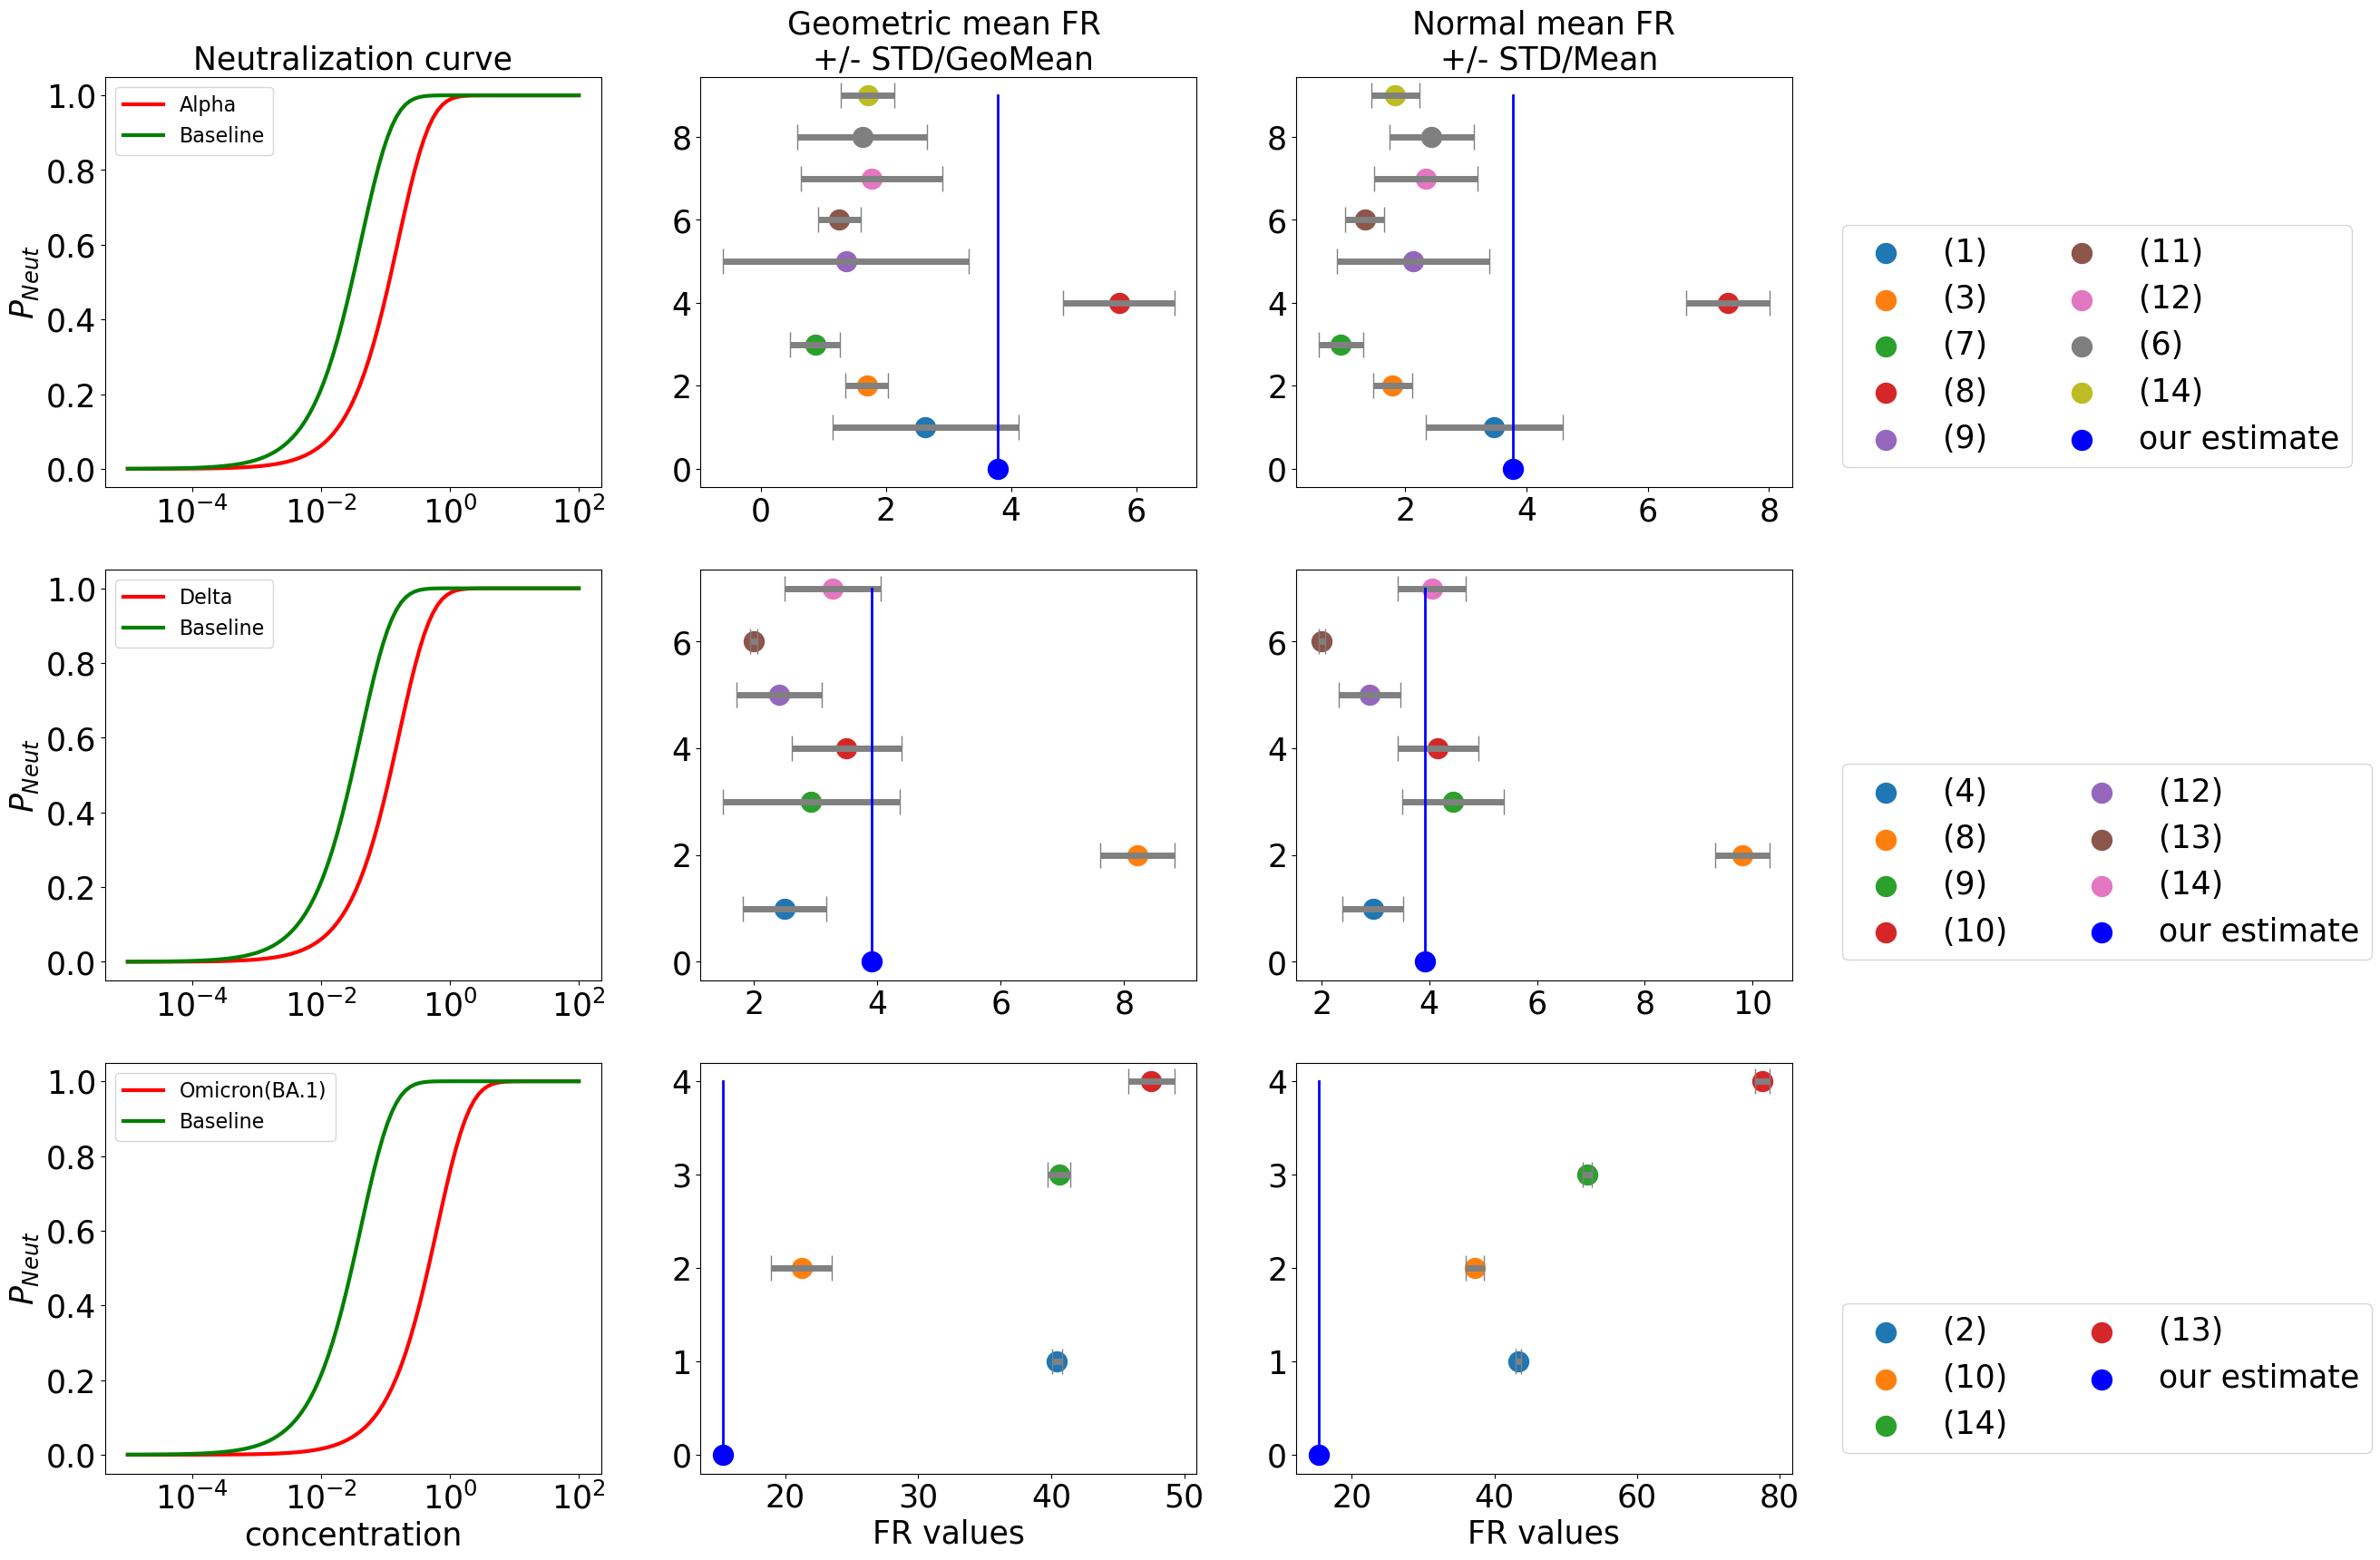

In [5]:
import matplotlib
from matplotlib import pyplot as plt
def PreFig(xsize =12, ysize = 12):
    '''
    @brief: customize figure parameters
    '''
    matplotlib.rc('xtick', labelsize=xsize) 
    matplotlib.rc('ytick', labelsize=ysize)

from scipy.optimize import root
def func(c, prop, lineage, antigen, cross_dic, var_cross):
    return PNeut(c, lineage, antigen, cross_dic, var_cross) - prop

def find_conc(prop, lineage, antigen, cross_dic, var_cross):
    conc_prop = root(func, 0, args = (prop, lineage, antigen, cross_dic, var_cross), method = "lm")
    return conc_prop.x

file1 = open(Folder+"Cross_Sim.pck", "rb")
cross_dic = pickle.load(file1)
var_cross = list(cross_dic["variant_list"])
cross_dic.pop("variant_list")
try:
    cross_dic.pop("Mutations")
except:
    pass
file1.close()

from scipy.stats import mstats
# Neut Assays corresponding to lineages
import pdb

def flat(x):
    res = []
    for xx in x:
        res+= xx
    return res
def GeoMean(x):
    return np.prod(x)**(1/len(x))

PreFig(xsize = 25, ysize =25)
fig = plt.figure(figsize=(24,20))
c = np.logspace(-5, 2, 100)
s = 1

for l in range(len(lin_list)): 
    lineage = lin_list[l]
    ax = fig.add_subplot(3,3,s)
    neut_curve = PNeut(c, lineage, "Wuhan-Hu-1", cross_dic, var_cross)
    neut_curve0 = PNeut(c, "Wuhan-Hu-1", "Wuhan-Hu-1", cross_dic, var_cross)
    plt.semilogx(c, neut_curve, linewidth = 3, color = "red", label = lineage)
    plt.semilogx(c, neut_curve0, linewidth = 3, color = "green", label = "Baseline")
    
    c_prop0 =  find_conc(0.50, "Wuhan-Hu-1", "Wuhan-Hu-1", cross_dic, var_cross)
    c_prop1 = find_conc(0.50, lineage, "Wuhan-Hu-1", cross_dic, var_cross)
    FR = c_prop1/c_prop0
    
    if s>6:
        plt.xlabel("concentration", fontsize = 25)
    plt.ylabel("$P_{Neut}$", fontsize = 25)
    plt.legend(fontsize = 16)
    
    ax2 = fig.add_subplot(3, 3, s+1)
   
    """
    FRdata = flat(FR_dic[lineage])
    gM = (np.prod(FRdata))**(1/len(FRdata))
    plt.scatter(np.ones(len(FRdata)), FRdata, marker = "o", color = "grey", label = "data", alpha = 0.5)
    plt.scatter([1], [gM], marker = "o", color = "orange", label = "data GEOMean")
    print(lineage, "GEOMean FR data", gM, "our estimate", FR[0])
    plt.scatter([1], FR, marker = "o", color = "blue", label = "our estimate")
    plt.ylabel("FR", fontsize = 16)
    ax2.set_xticks([1])
    ax2.set_xticklabels(["vac -> %s"%lineage])
    ax2.set_yscale("log")
    if s == 1:
        plt.legend(fontsize = 16, ncols = 3, loc = (0, 1.05))
    
    #ax2.set_xscale("log")
    #ax3.set_xscale("log")
    """
    
    FRdata_sep = FR_dic[lineage]
    GM = [GeoMean(FRdata_sep[i]) for i in range(len(FRdata_sep))]
    err = [np.std(FRdata_sep[i])/GM[i] for i in range(len(FRdata_sep))]
    ax2.errorbar(GM, np.cumsum(np.ones(len(GM))), xerr = err, yerr = None, ls = "none", capsize = 10, elinewidth = 5, color = "grey")
    for i in range(len(FRdata_sep)):
        ax2.scatter(GM[i], i+1, marker = "o", s = 250, label = FR_sources[lineage][i])
    
    plt.plot(FR*np.ones(2), [0, len(GM)], linewidth = 2, color = "blue")
    
    ax2.scatter(FR, 0, marker = "o", s= 250, color = "blue", label = "our estimate")
    ax3 = fig.add_subplot(3, 3, s+2)
    nM = [np.mean(FRdata_sep[i]) for i in range(len(FRdata_sep))]
    err2 = [np.std(FRdata_sep[i])/nM[i] for i in range(len(FRdata_sep))]
    
    ax3.errorbar(nM, np.cumsum(np.ones(len(nM))), xerr = err2, yerr = None, ls = "none",capsize = 10, elinewidth = 5, color = "grey")
    for i in range(len(FRdata_sep)):
        ax3.scatter(nM[i], i+1, marker = "o", s = 250, label = FR_sources[lineage][i])
        
    plt.plot(FR*np.ones(2), [0, len(nM)], linewidth = 2, color = "blue")
    ax3.scatter(FR, 0, marker = "o", s= 250, color = "blue",label = "our estimate")
    if s in (1, 4, 7):
        plt.legend(fontsize = 25, ncols = 2, loc = (1.10, 0.05))
    
    if s == 1:
        ax.set_title("Neutralization curve", fontsize = 25)
        ax2.set_title("Geometric mean FR \n +/- STD/GeoMean", fontsize = 25)
        ax3.set_title("Normal mean FR\n +/- STD/Mean", fontsize = 25)
    
    if s == 7:
        ax2.set_xlabel("FR values", fontsize = 25)
        ax3.set_xlabel("FR values", fontsize = 25)
    
    Data_dic = {"References": FR_sources[lineage], lineage + "FR GeoMean": GM, lineage + "FR Mean": nM, "STD/GeoMean": err, "STD/Mean": err2}
    df = pd.DataFrame(Data_dic)
    df.to_excel(Folder + "%s_FR_data.xlsx"%lineage)
    s +=3

fig.savefig(Folder+"FRs.svg")
fig.savefig(Folder+"FRs.png")

plt.show()

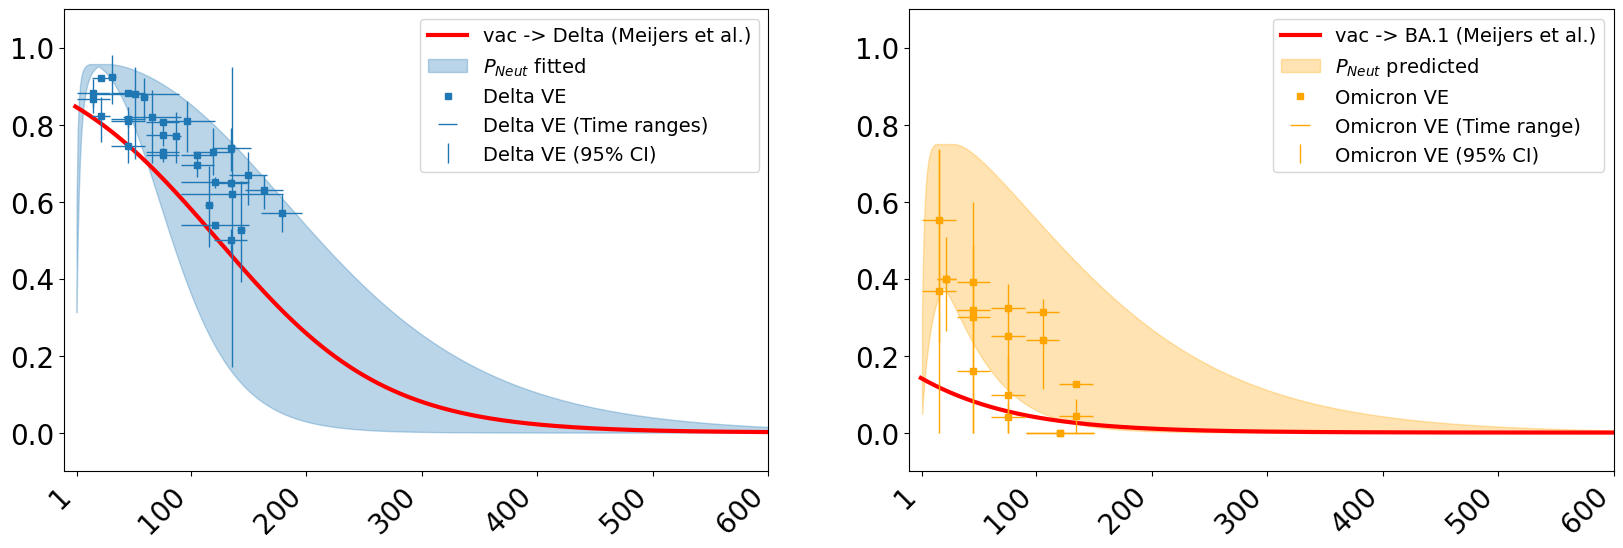

In [6]:
### Meijers Cross-Immunity estimates vs Vaccine Efficacy data
lbd = 0.9
T50 = 4.2
tau = 65

def H(Tik, delta_t, T50, lbd):
    Tik_t = Tik - delta_t/tau
    res = 1./(1 + np.exp(-lbd*(Tik_t-T50)))
    return res
              
delta_t = np.linspace(0, 600, 600)             
PreFig(xsize = 20, ysize =20)
fig = plt.figure(figsize=(20,6))
              
ax = fig.add_subplot(1,2,1)         
Tik_list1 = [6.1]#, 8.3]  ## vac, booster
lab1 = ["vac -> Delta (Meijers et al.)", "boost -> Delta (Meijers et al.)"]
col = ["red", "green"]  
for i in range(len(Tik_list1)):
    Tik = Tik_list1[i]
    res = H(Tik, delta_t, T50, lbd)
    plt.plot(delta_t, res, linewidth = 3, color = col[i], label = lab1[i])

# Our PNeut
### Load Data already pre-made #####
Pneut_Delta_df = pd.read_csv('data/PNeut_Delta_validation.csv')
Pneut_Delta_df.drop(columns = "Unnamed: 0", inplace = True)
delt_t = Pneut_Delta_df["Day since infection"]
"""Add PNeut Envelope Delta """
col_d = "#1f77b4"
EnvD_Min, EnvD_Max = Pneut_Delta_df["Proba Neut Min"], Pneut_Delta_df["Proba Neut Max"]
plt.fill_between(delt_t, EnvD_Min, EnvD_Max, alpha = 0.3, color = col_d, label = "$P_{Neut}$ fitted")

# VE Delta
VE_Delta_df = pd.read_csv('data/Processed_Clinical_Delta_VE.csv')
VE_Delta_df.drop(columns = "Unnamed: 0", inplace = True)
 
All_Days_Delta = VE_Delta_df["Day since vacc (data)"].values
All_Delta_Data = VE_Delta_df["Processed VE"].values
All_Days_xerr_Delta = VE_Delta_df["Days Err (+/-)"].values
All_Delta_yerr = np.zeros((2, len(All_Days_Delta)))
All_Delta_yerr[0, :] = VE_Delta_df["VE errorbar (min)"].values
All_Delta_yerr[1, :] = VE_Delta_df["VE errorbar (max)"].values

### this is always equal to All_Days_Delta, All_Delta_Data, but used for clarity
ve_fitted = VE_Delta_df["Processed VE (used in IC50 fitting)"].values
days_fitted = VE_Delta_df["Day since vacc (used in IC50 fitting)"].values

elw = 1
ms = 5
fs = "full"
plt.plot(days_fitted, ve_fitted, "s", 
         markersize = ms, color = col_d, fillstyle = fs, 
         label = "Delta VE")

plt.errorbar(All_Days_Delta, All_Delta_Data, yerr = None, 
             xerr = All_Days_xerr_Delta, elinewidth=elw, 
             linestyle = "", ecolor = col_d, 
             label= "Delta VE (Time ranges)")

plt.errorbar(All_Days_Delta, All_Delta_Data, yerr = All_Delta_yerr, 
             xerr = None, elinewidth=elw, linestyle = "", 
             ecolor = col_d, 
             label = "Delta VE (95% CI)")

ax.set_ylim((-0.1, 1.1))
ax.set_xticks([1, 100, 200, 300, 400, 500, 600])
ax.set_xticklabels([1, 100, 200, 300, 400, 500, 600], rotation = 45, horizontalalignment = "right")
ax.set_xlim((-10, 600))

plt.legend(fontsize = 14)
ax = fig.add_subplot(1,2,2)
Tik_list2 = [2.2]#, 7.1] ## vacc, booster -- Table S1 Folder+Neut_assays/1-s2.0-S0092867423010760-mmc1.pdf
lab2 = ["vac -> BA.1 (Meijers et al.)", "boost -> BA.1 (Meijers et al.)"]
col = ["red", "green"]  
for i in range(len(Tik_list2)):
    Tik = Tik_list2[i]
    res = H(Tik, delta_t, T50, lbd)
    plt.plot(delta_t, res, linewidth = 3, color = col[i], label = lab2[i])

# Our PNeut
### Load P_Neut Data already pre-made ####
Pneut_Omicron_df = pd.read_csv('data/PNeut_Omicron_validation.csv')
Pneut_Omicron_df.drop(columns = "Unnamed: 0", inplace = True)
om_t = Pneut_Omicron_df["Day since infection"]
"""Add PNeut Envelope Omicron validation"""
col_o = "orange"
EnvO_Min, EnvO_Max = Pneut_Omicron_df["Proba Neut Min"], Pneut_Omicron_df["Proba Neut Max"]
plt.fill_between(om_t, EnvO_Min, EnvO_Max, alpha = 0.3, color = col_o, label = "$P_{Neut}$ predicted")

### VE Omicron BA.1
VE_Omicron_df = pd.read_csv('data/Processed_Clinical_Omicron_VE.csv')
VE_Omicron_df.drop(columns = "Unnamed: 0", inplace = True)

All_Days_Omicron = VE_Omicron_df["Day since vacc (data)"].values
All_Omicron_Data = VE_Omicron_df["Processed VE"].values
All_Days_xerr_Omicron = VE_Omicron_df["Days Err (+/-)"].values
All_Omicron_yerr = np.zeros((2, len(All_Days_Omicron)))
All_Omicron_yerr[0, :] = VE_Omicron_df["VE errorbar (min)"]
All_Omicron_yerr[1, :] = VE_Omicron_df["VE errorbar (max)"]

elw = 1
plt.errorbar(All_Days_Omicron, All_Omicron_Data, yerr = None, 
             xerr = All_Days_xerr_Omicron, elinewidth=elw, 
             linestyle = "", ecolor = col_o, 
             label= "Omicron VE (Time range)")

ms = 5
fs = "full"
plt.plot(All_Days_Omicron, All_Omicron_Data, "s", 
         markersize = ms, color = col_o, fillstyle = fs, 
         label = "Omicron VE")

plt.errorbar(All_Days_Omicron, All_Omicron_Data, yerr = All_Omicron_yerr, 
             xerr = None, elinewidth=elw, 
             linestyle = "", ecolor = "orange", 
             label = "Omicron VE (95% CI)")


ax.set_ylim((-0.1, 1.1))
ax.set_xticks([1, 100, 200, 300, 400, 500, 600])
ax.set_xticklabels([1, 100, 200, 300, 400, 500, 600], rotation = 45, horizontalalignment = "right")
ax.set_xlim((-10, 600))

plt.legend(fontsize = 14)


plt.show()
fig.savefig(Folder+"Revisions/PNeut_vs_Meijers.svg")
fig.savefig(Folder+"Revisions/PNeut_vs_Meijers.png")
fig.savefig(Folder+"PNeut_vs_Meijers.svg")
fig.savefig(Folder+"PNeut_vs_Meijers.png")

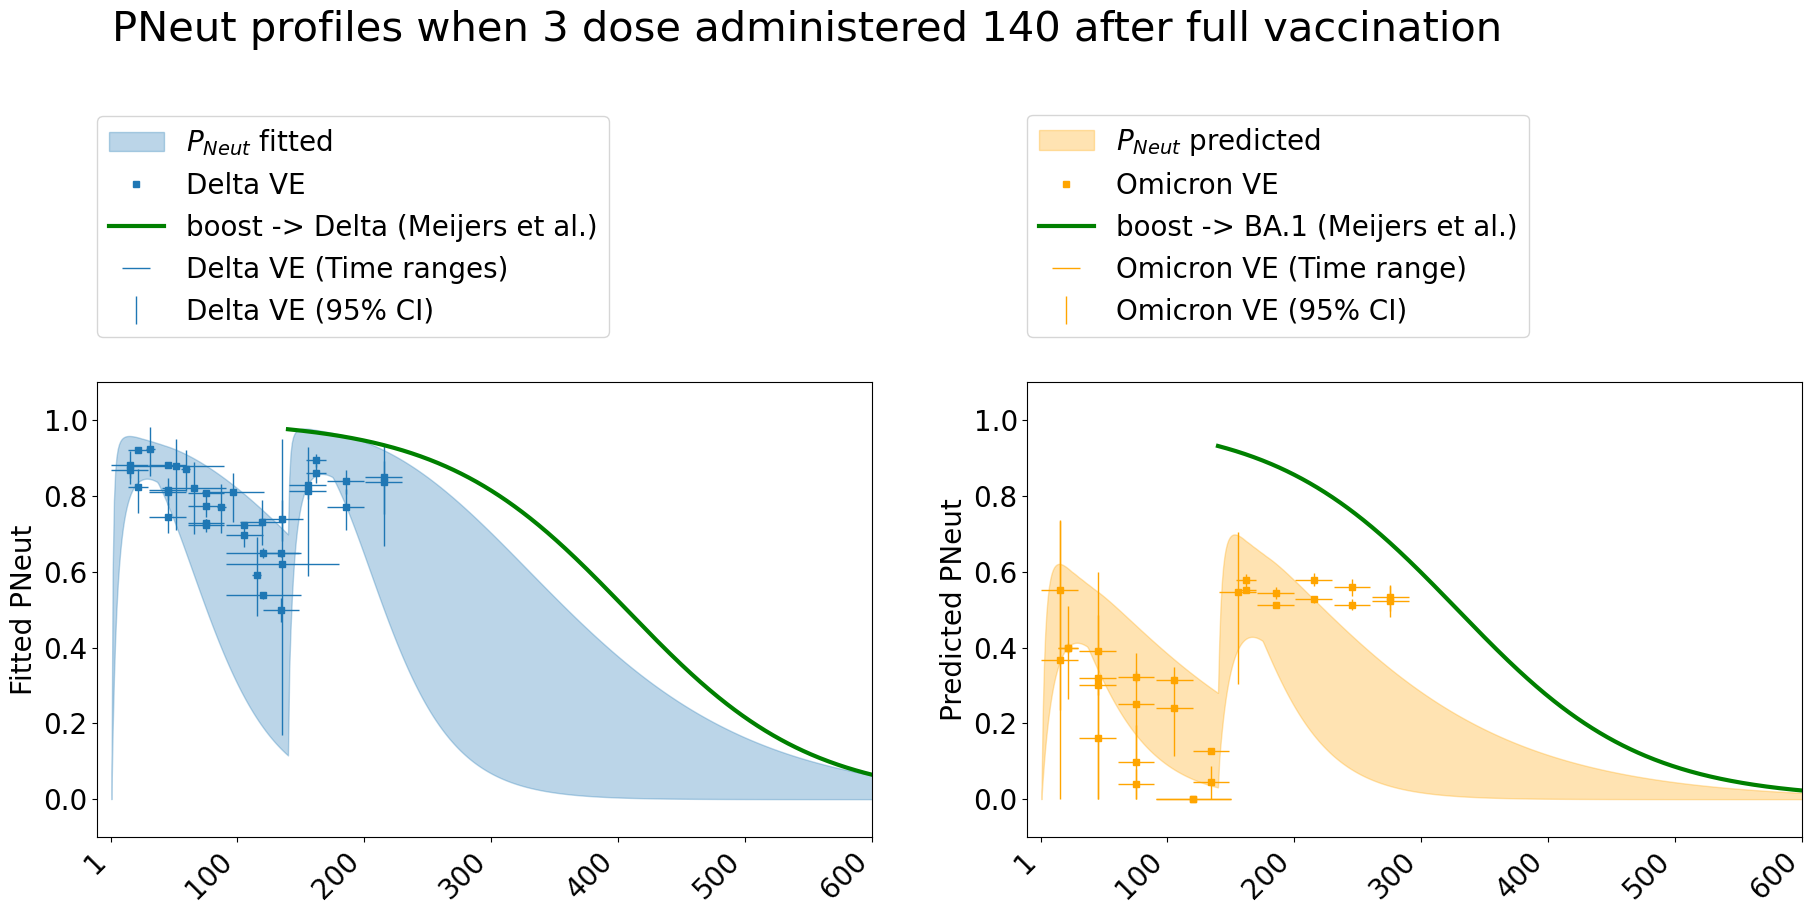

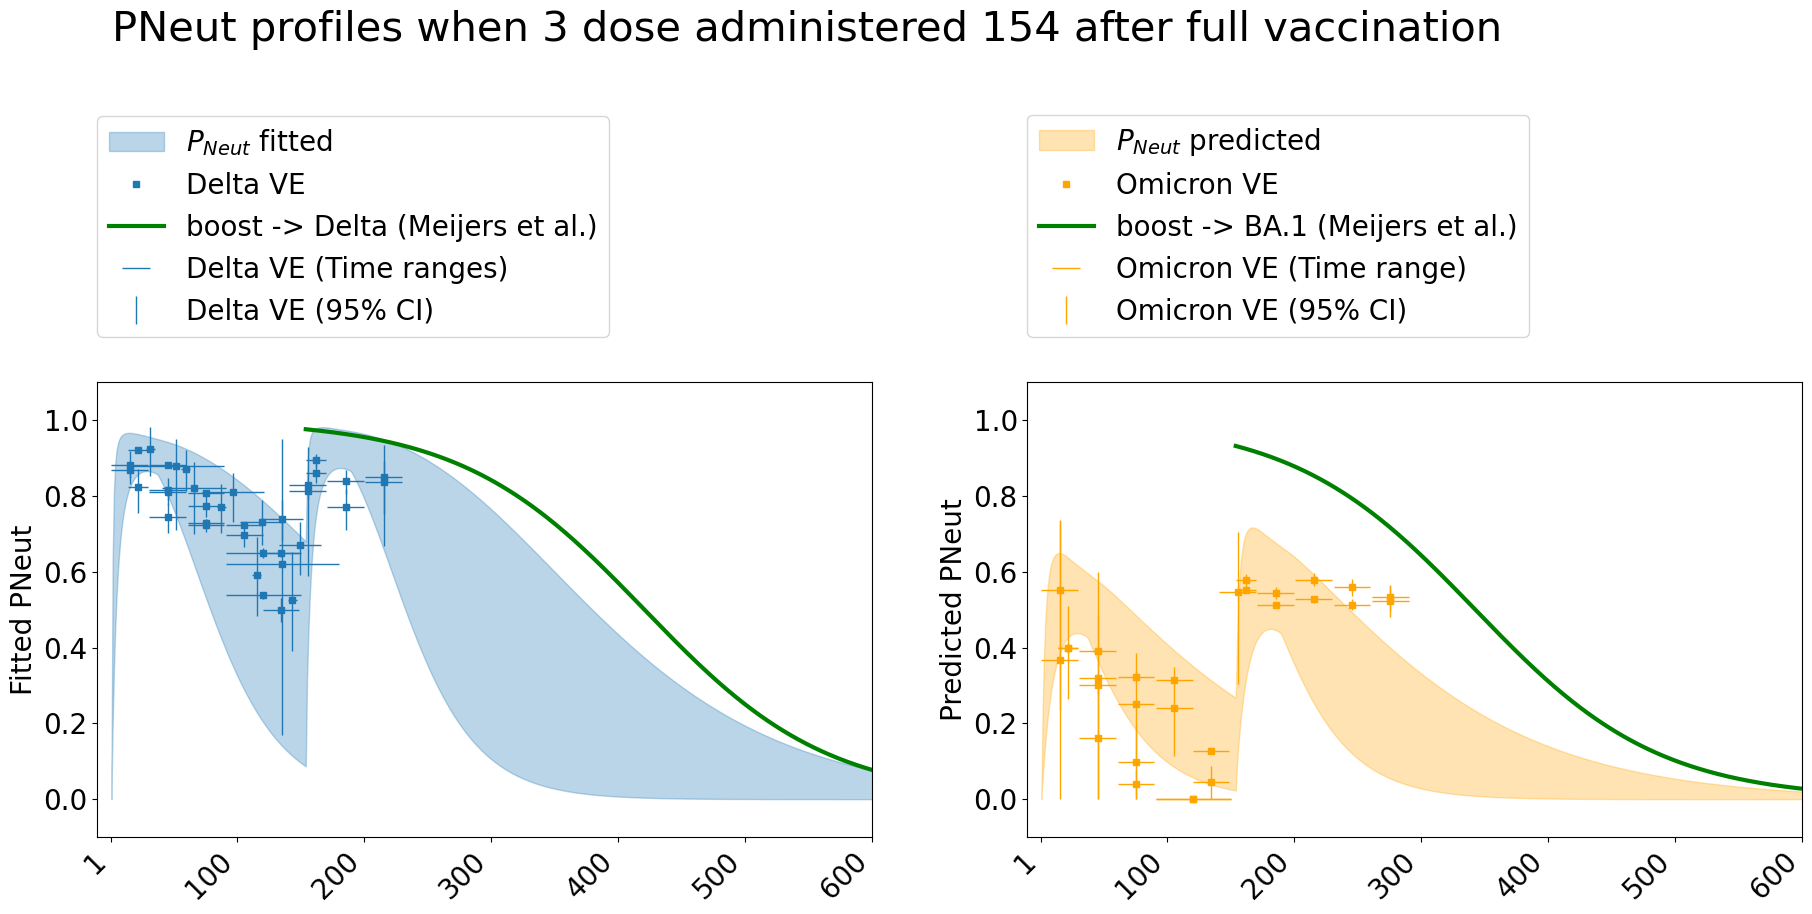

In [7]:
### Adding booster and 2 dose vaccine PK model
t_boost = [140, 154] # (140 = approximately 4.5 months after 2nd dose Gram et al 2022. page 4, 154 = we add a margin of 2 weeks for the second simulation)

from scripts2.Expected_immunized.PNeut_boost import PNeut_boost

Cross_delta = "data/Cross_with_delta_valitation.pck"
Cross_Neut = Folder+"Cross_Sim.pck"
dms_data = "data/dms_per_ab_per_site.csv"
clinical_VE_delta = "data/Clinical_Delta_VE_plus_booster.xlsx"
antigen1= "Wuhan-Hu-1"
antigen2 = "Wuhan-Hu-1"

#from scripts2.Expected_immunized.PNeut import PNeut ### without booster
#PNeut(Cross_delta, Cross_Neut, dms_data, clinical_VE_delta, ["Delta"] ,[antigen1], Folder)
#PNeut(Cross_delta, Cross_Neut, dms_data, clinical_VE_delta, ["Omicron(BA.1)"] ,[antigen2],Folder)

clinical_VE_omicron = "data/Clinical_Omicron_VE_plus_booster.xlsx" 

import os
if not os.path.exists(Folder+"Boost1"):
    os.mkdir(Folder+"Boost1")

"""Uncomment this for re-runing the simulations (needed if you change the mutation profiles in Cell 2)"""
#PNeut_boost(Cross_delta, Cross_Neut, dms_data, t_boost[0], clinical_VE, ["Delta"] ,[antigen1], Folder+"Boost1")
#PNeut_boost(Cross_delta, Cross_Neut, dms_data, t_boost[0], clinical_VE, ["Omicron(BA.1)"] ,[antigen2],Folder+"Boost1")

if not os.path.exists(Folder+"Boost2"):
    os.mkdir(Folder+"Boost2")
#PNeut_boost(Cross_delta, Cross_Neut, dms_data, t_boost[1], clinical_VE, ["Delta"] ,[antigen1], Folder+"Boost2")
#PNeut_boost(Cross_delta, Cross_Neut, dms_data, t_boost[1], clinical_VE, ["Omicron(BA.1)"] ,[antigen2],Folder+"Boost2")


"""Extract information from Clinical data"""
def transform(x):
    x[x<0] = 0
    return x

def extract_yerr(x, CI):
    lower_diff = np.minimum(transform(x), np.abs(x - CI[:, 0]))
    upper_diff = np.minimum(transform(x), np.abs(CI[:, 1] - x))
    return np.array([lower_diff, upper_diff]), CI[:, 1], CI[:, 0]

def extract_vacc(data, tvacRem):
    datadf = pd.read_excel(data, engine='openpyxl')
    try:
        datadf.drop(columns = "Unnamed: 0", inplace = True)
    except:
        pass
    
    dates_inj = datadf["Vaccine"].values.astype(str)
    days = datadf["Days (Mid)"].to_numpy()
    kept_dates = np.array([ (days[i]<tvacRem)|("After" in dates_inj[i]) for i in range(len(dates_inj))])
    keep_method = (datadf["Method"].values.astype(str) != "(1 - Adjusted OR)") & (datadf["Method"].values.astype(str) != "(1 - OR)")
    keep = (~np.isnan(days))&keep_method&kept_dates
    days = days[keep]
    points = datadf["VE (value)"].values[keep]
    data_source = datadf["Source"].values[keep]
    CI = np.array([datadf["VE (Lower CI)"].values[keep], datadf["VE (Upper CI)"].values[keep]]).T
    yerr, CI1, CI2 = extract_yerr(np.array(points), CI)
    xerr = np.array(datadf["Days Err (+/-)"].values[keep])
    return days, points, yerr, xerr



for i in (1, 2):
    days_fitted,  ve_fitted, All_Delta_yerr, All_Days_xerr_Delta,  = extract_vacc(clinical_VE_delta, t_boost[i-1])
    All_Days_Delta = days_fitted
    All_Delta_Data = ve_fitted

    All_Days_Omicron, All_Omicron_Data, All_Omicron_yerr, All_Days_xerr_Omicron = extract_vacc(clinical_VE_omicron, t_boost[i-1])

    Boost = "Boost%s/"%i
    PreFig(xsize = 20, ysize =20)
    fig1 = plt.figure(figsize=(22,13))
    ax = fig1.add_subplot(2,2,3)
    plt.text(1.5, 2, "PNeut profiles when 3 dose administered %s after full vaccination"%t_boost[i-1], fontsize = 30)

    PneutB_Delta_df = pd.read_csv(Folder+Boost+'P_neut_Delta.csv')
    PneutB_Delta_df.drop(columns = "Unnamed: 0", inplace = True)
    delt_t = PneutB_Delta_df["Day since infection"]

    col_d = "#1f77b4"
    EnvD_Min, EnvD_Max = PneutB_Delta_df["Proba Neut Min\n vs. %s antigen"%antigen1], PneutB_Delta_df["Proba Neut Max\n vs. %s antigen"%antigen1]
    plt.fill_between(delt_t, EnvD_Min, EnvD_Max, alpha = 0.3, color = col_d, label = "$P_{Neut}$ fitted")
    ax.set_ylim((-0.1, 1.1))
    ax.set_xticks([1, 100, 200, 300, 400, 500, 600])
    ax.set_xticklabels([1, 100, 200, 300, 400, 500, 600], rotation = 45, horizontalalignment = "right")
    ax.set_xlim((-10, 600))
    ax.set_ylabel("Fitted PNeut", fontsize = 20)
    
    
    elw = 1
    ms = 5
    fs = "full"
    plt.plot(days_fitted, ve_fitted, "s", 
             markersize = ms, color = col_d, fillstyle = fs, 
             label = "Delta VE")

    plt.errorbar(All_Days_Delta, All_Delta_Data, yerr = None, 
                 xerr = All_Days_xerr_Delta, elinewidth=elw, 
                 linestyle = "", ecolor = col_d, 
                 label= "Delta VE (Time ranges)")

    plt.errorbar(All_Days_Delta, All_Delta_Data, yerr = All_Delta_yerr, 
                 xerr = None, elinewidth=elw, linestyle = "", 
                 ecolor = col_d, 
                 label = "Delta VE (95% CI)")
    
    Tik_list1 = [8.3]  ## booster
    lab1 = ["boost -> Delta (Meijers et al.)"]
    col = ["green"]
    for j in range(len(Tik_list1)):
        Tik = Tik_list1[j]
        res = H(Tik, delta_t, T50, lbd)
        plt.plot(t_boost[i-1]+delta_t, res, linewidth = 3, color = col[j], label = lab1[j])
    
    plt.legend(loc = (0, 1.1), ncols = 1, fontsize = 20)
    
    ax = fig1.add_subplot(2,2,4)
    PneutB_Omicron_df = pd.read_csv(Folder+Boost+'P_neut_Omicron(BA.1).csv')
    PneutB_Omicron_df.drop(columns = "Unnamed: 0", inplace = True)
    om_t = Pneut_Omicron_df["Day since infection"]
    col_o = "orange"
    EnvO_Min, EnvO_Max = PneutB_Omicron_df["Proba Neut Min\n vs. %s antigen"%antigen2], PneutB_Omicron_df["Proba Neut Max\n vs. %s antigen"%antigen2]
    plt.fill_between(om_t, EnvO_Min, EnvO_Max, alpha = 0.3, color = col_o, label = "$P_{Neut}$ predicted")

    elw = 1
    plt.errorbar(All_Days_Omicron, All_Omicron_Data, yerr = None, 
                 xerr = All_Days_xerr_Omicron, elinewidth=elw, 
                 linestyle = "", ecolor = col_o, 
                 label= "Omicron VE (Time range)")

    ms = 5
    fs = "full"
    plt.plot(All_Days_Omicron, All_Omicron_Data, "s", 
             markersize = ms, color = col_o, fillstyle = fs, 
             label = "Omicron VE")

    plt.errorbar(All_Days_Omicron, All_Omicron_Data, yerr = All_Omicron_yerr, 
                 xerr = None, elinewidth=elw, 
                 linestyle = "", ecolor = "orange", 
                 label = "Omicron VE (95% CI)")

    Tik_list2 = [7.1] ## booster -- Table S1 Folder+Neut_assays/1-s2.0-S0092867423010760-mmc1.pdf
    lab2 = ["boost -> BA.1 (Meijers et al.)"]
    col = ["green"]  
    for j in range(len(Tik_list2)):
        Tik = Tik_list2[j]
        res = H(Tik, delta_t, T50, lbd)
        plt.plot(t_boost[i-1]+delta_t, res, linewidth = 3, color = col[j], label = lab2[j])
    
    ax.set_ylim((-0.1, 1.1))
    ax.set_xticks([1, 100, 200, 300, 400, 500, 600])
    ax.set_xticklabels([1, 100, 200, 300, 400, 500, 600], rotation = 45, horizontalalignment = "right")
    ax.set_xlim((-10, 600))
    ax.set_ylabel("Predicted PNeut", fontsize = 20)
    
    """
    ax = fig1.add_subplot(2,2,3)
    ax.set_ylabel("Fitted PK profile", fontsize = 20)
    PK_Delta_df = pd.read_csv(Folder+Boost+'PK_for_all_Epitopes_Delta.csv')
    PK_Delta_df.drop(columns = "Unnamed: 0", inplace = True)
    delt_t = PK_Delta_df["Day since activation"]
    PK_Delta_df.drop(columns = "Day since activation", inplace = True)
    PK_Delta = PK_Delta_df.to_numpy()

    col_d = "#1f77b4"
    EnvD_Min, EnvD_Max = np.min(PK_Delta, axis = 1), np.max(PK_Delta, axis = 1)
    plt.fill_between(delt_t, EnvD_Min, EnvD_Max, alpha = 0.3, color = col_d, label = "$PK$ used for Delta")
    ax.set_ylim((-0.1, 1.2))
    ax.set_xticks([1, 100, 200, 300, 400, 500, 600])
    ax.set_xticklabels([1, 100, 200, 300, 400, 500, 600], rotation = 45, horizontalalignment = "right")
    ax.set_xlim((-10, 600))

    
    ax = fig1.add_subplot(2,2,4)
    ax.set_ylabel("Should be the same as Fitted PK profile", fontsize = 20)
    PK_Omicron_df = pd.read_csv(Folder+Boost+'PK_for_all_Epitopes_Omicron(BA.1).csv')
    PK_Omicron_df.drop(columns = "Unnamed: 0", inplace = True)
    om_t = PK_Omicron_df["Day since activation"]
    PK_Omicron_df.drop(columns = "Day since activation", inplace = True)
    PK_Omicron = PK_Omicron_df.to_numpy()

    col_o = "orange"
    EnvO_Min, EnvO_Max = np.min(PK_Omicron, axis = 1), np.max(PK_Omicron, axis = 1)
    plt.fill_between(om_t, EnvO_Min, EnvO_Max, alpha = 0.3, color = col_o, label = "$PK$ used for Omicron")


    ax.set_ylim((-0.1, 1.2))
    ax.set_xticks([1, 100, 200, 300, 400, 500, 600])
    ax.set_xticklabels([1, 100, 200, 300, 400, 500, 600], rotation = 45, horizontalalignment = "right")
    ax.set_xlim((-10, 600))
    """
    plt.legend(loc = (0, 1.1), ncols = 1, fontsize = 20)
    plt.show()
    fig1.savefig(Folder+"Revisions/PNeut_vs_Meijers_Boost_%s.svg"%i)
    fig1.savefig(Folder+"Revisions/PNeut_vs_Meijers_Boost_%s.png"%i)
    
    fig1.savefig(Folder+"PNeut_vs_Meijers_Boost_%s.svg"%i)
    fig1.savefig(Folder+"PNeut_vs_Meijers_Boost_%s.png"%i)
